In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

In [12]:
def target(x):
    return 10*x[0]**2+x[1]**2

def diff_target(x, A):
    return np.dot(A, x)

In [13]:
def draw_contour(target):
    n = 100
    x = np.linspace(-5, 5, n)
    y = np.linspace(-5, 5, n)
    X, Y = np.meshgrid(x, y)
    Z = target([X, Y])

    plt.gca().set_aspect('equal')
    plt.contour(X, Y, Z, levels=np.linspace(0, 200, 15))

In [14]:
def backtrack(x, target, A, alpha, beta):
    eps = 1
    while(target(x - eps*diff_target(x, A)) - target(x) > -alpha*eps*np.linalg.norm(diff_target(x, A))**2):
        eps *= beta
    return eps

def do_backtrack(x1, target, A, alpha, beta, times):
    x = x1
    ans = np.copy(x1)
    for i in range(times):
        x -= backtrack(x, target, A, alpha, beta) * diff_target(x, A)
        ans = np.vstack([ans, x])
    return ans

In [15]:
alpha = 0.5
beta = 0.8
A = np.array([[20, 0],[0, 2]])
ans = do_backtrack(np.array([1, 5], dtype='float64'), target, A, alpha, beta, 4)

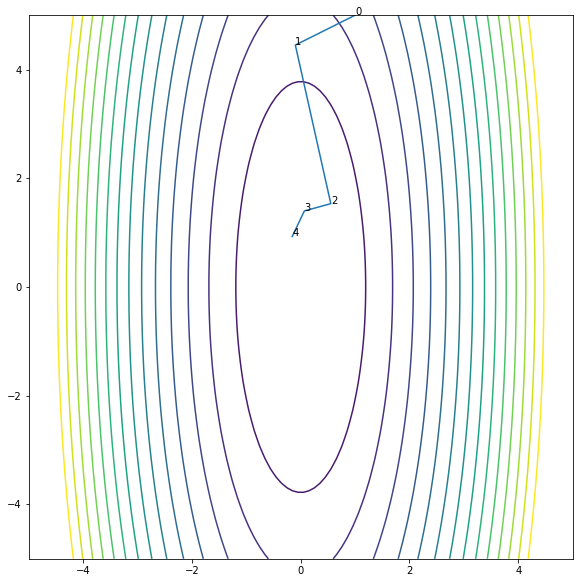

In [16]:
fig,ax = plt.subplots()
ax.plot(ans[:, 0], ans[:, 1])
draw_contour(target)
for i, (x, y) in enumerate(zip(ans[:, 0], ans[:, 1])):
    ax.annotate(str(i), (x, y))